Kelompok 16

*percobaan*
* Hidden Layer 1: 32 neuron + bias, aktivasi ReLU
* Dropout 0.2
* Hidden Layer 2: 16 neuron + bias, aktivasi ReLU
* Dropout 0.2
* Hidden Layer 3: 8 neuron + bias, aktivasi ReLU
* Output Layer: 1 neuron, aktivasi linear

* Split data: 80% train – 20% test
* Optimizer: Adam (learning rate 0.001)
* Batch size: 10
* Epoch: 50
* Evaluasi: MAE, RMSE, dan R² Score

In [ ]:
pip install --upgrade ml-dtypes


In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"


In [ ]:
import sys
for key in list(sys.modules.keys()):
    if "jax" in key or "keras" in key or "tensorflow" in key:
        del sys.modules[key]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
pip install --upgrade --force-reinstall tensorflow==2.16.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 548.0/589.9 MB 123.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 148.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.

In [ ]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Load dataset
data = pd.read_excel("Data Deep Learning Kel.16.xlsx")

# Hapus baris pertama jika berisi keterangan teks
data = data.drop(0, axis=0).reset_index(drop=True)

#Konversi tipe data
# Ubah kolom numerik ke float (jika ada teks akan jadi NaN)
numeric_cols = [
    'Jumlah Jam Tidur',
    'Jumlah Jam Belajar',
    'Jumlah Sesi Belajar',
    'Lama Penggunaan Screen Time'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Isi NaN dengan rata-rata
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

#Label encoding untuk kolom kategorik
if 'Aktifitas Utama' in data.columns:
    le = LabelEncoder()
    data['Aktifitas Utama'] = le.fit_transform(data['Aktifitas Utama'])

#Hitung variabel Y (Produktivitas)
data['Produktivitas'] = (
    0.2 * (data['Jumlah Jam Tidur'] / 8) +
    0.3 * (data['Jumlah Jam Belajar'] / data['Jumlah Jam Belajar'].max()) +
    0.2 * (data['Jumlah Sesi Belajar'] / data['Jumlah Sesi Belajar'].max()) +
    0.1 * (1 - data['Lama Penggunaan Screen Time'] / data['Lama Penggunaan Screen Time'].max())
) * 10

data['Produktivitas'] = data['Produktivitas'].clip(1, 10)

print("\n Data setelah menghitung Produktivitas:")
print(data[['Jumlah Jam Tidur','Jumlah Jam Belajar','Jumlah Sesi Belajar','Lama Penggunaan Screen Time','Produktivitas']].head())



 Data setelah menghitung Produktivitas:
   Jumlah Jam Tidur  Jumlah Jam Belajar  Jumlah Sesi Belajar  \
0               7.0                   1                    4   
1               6.0                   3                    3   
2               7.0                   4                    3   
3               6.0                  10                    4   
4               7.0                   4                    3   

   Lama Penggunaan Screen Time  Produktivitas  
0                          4.0       4.377778  
1                          5.0       4.172222  
2                          5.0       4.672222  
3                          7.0       6.211111  
4                          7.0       4.561111  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 21.1738 - mae: 4.4844 - val_loss: 19.8937 - val_mae: 4.3030
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.2032 - mae: 4.3634 - val_loss: 18.8136 - val_mae: 4.1740
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.7139 - mae: 4.2060 - val_loss: 17.6351 - val_mae: 4.0283
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.2293 - mae: 4.1357 - val_loss: 16.3546 - val_mae: 3.8634
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.7597 - mae: 3.8273 - val_loss: 14.9276 - val_mae: 3.6712
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.8515 - mae: 3.8118 - val_loss: 13.2545 - val_mae: 3.4316
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.9991 - mae: 3.5114 - val_loss: 11.4783 - val_mae: 3.1535
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.6242 - mae: 3.3976 - val_loss: 9.7060 - val_mae: 2.8427
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.4399 - ma

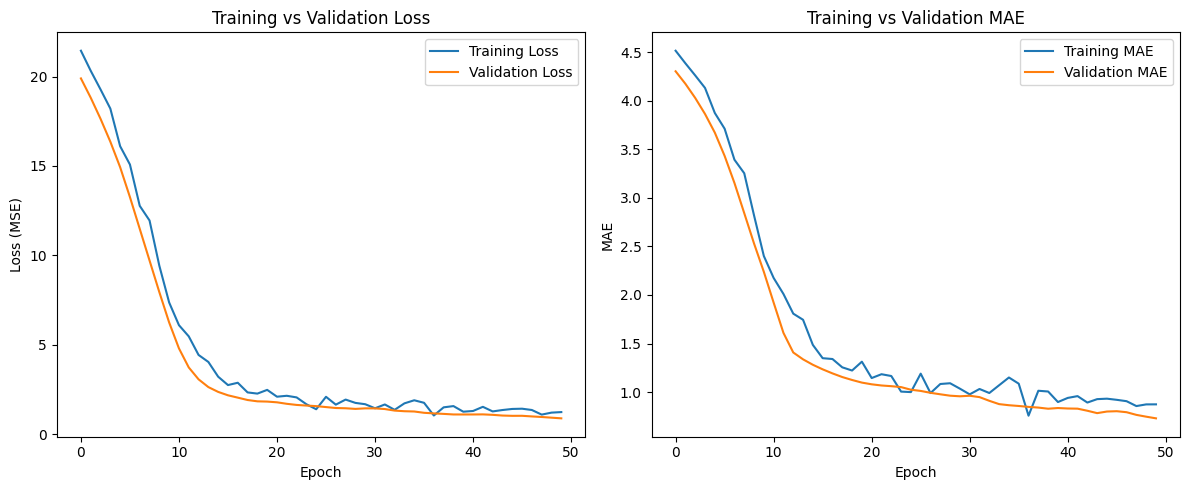

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step

📊 HASIL EVALUASI MODEL
MAE       : 0.7296
RMSE      : 0.9365
R² Score  : 0.3665


In [ ]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 2. LOAD DATASET
data = pd.read_excel("Data Deep Learning Kel.16.xlsx")

# Hapus baris pertama jika berisi keterangan teks
data = data.drop(0, axis=0).reset_index(drop=True)

# 3. PREPROCESSING
numeric_cols = [
    'Jumlah Jam Tidur',
    'Jumlah Jam Belajar',
    'Jumlah Sesi Belajar',
    'Lama Penggunaan Screen Time'
]

# Konversi numerik
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Mengisi NaN
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Label encoding
if 'Aktifitas Utama' in data.columns:
    le = LabelEncoder()
    data['Aktifitas Utama'] = le.fit_transform(data['Aktifitas Utama'])

# 4. HITUNG VARIABEL TARGET (Produktivitas)
data['Produktivitas'] = (
    0.2 * (data['Jumlah Jam Tidur'] / 8) +
    0.3 * (data['Jumlah Jam Belajar'] / data['Jumlah Jam Belajar'].max()) +
    0.2 * (data['Jumlah Sesi Belajar'] / data['Jumlah Sesi Belajar'].max()) +
    0.1 * (1 - data['Lama Penggunaan Screen Time'] / data['Lama Penggunaan Screen Time'].max())
) * 10

data['Produktivitas'] = data['Produktivitas'].clip(1, 10)


# 5. SPLIT FITUR DAN TARGET
X = data[['Jumlah Jam Tidur', 'Jumlah Jam Belajar', 'Aktifitas Utama',
          'Lama Penggunaan Screen Time', 'Jumlah Sesi Belajar']]
y = data['Produktivitas']

# 6. NORMALISASI
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. SPLITTING DATA 80% TRAIN 20% TEST
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 8. MODEL MLP SESUAI SPESIFIKASI
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1], use_bias=True),
    Dropout(0.2),

    Dense(16, activation='relu', use_bias=True),
    Dropout(0.2),

    Dense(8, activation='relu'),

    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

# 9.TRAINING MODEL
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=10,
    verbose=1
)

# 9.1 PLOT TRAINING vs VALIDATION
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

# 10. EVALUASI MODEL
# Prediksi
y_pred = model.predict(X_test).flatten()

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("\n📊 HASIL EVALUASI MODEL")
print(f"MAE       : {mae:.4f}")
print(f"RMSE      : {rmse:.4f}")
print(f"R² Score  : {r2:.4f}")

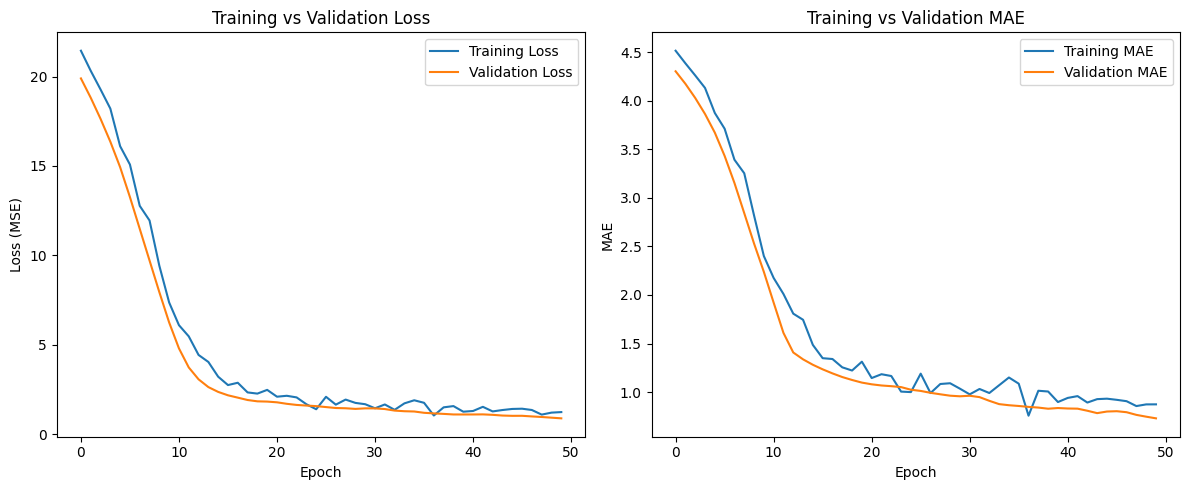

In [ ]:
# ===============================
# 9.1 PLOT TRAINING vs VALIDATION
# ===============================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

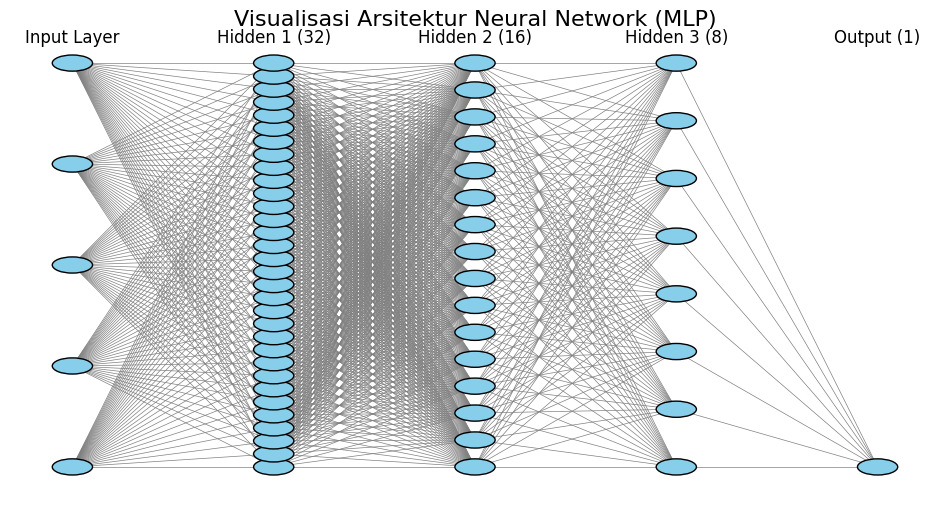

In [ ]:
#visulisasinya
import matplotlib.pyplot as plt
import numpy as np

# Fungsi menggambar satu layer
def draw_layer(ax, layer_x, n_neurons, layer_name):
    y_positions = np.linspace(0, 1, n_neurons)
    for y in y_positions:
        circle = plt.Circle((layer_x, y), 0.02, color='skyblue', ec='black', zorder=3)
        ax.add_patch(circle)
    ax.text(layer_x, 1.05, layer_name, ha='center', fontsize=12)
    return y_positions

# Fungsi menggambar garis antar layer
def connect_layers(ax, x1, y1_list, x2, y2_list):
    for y1 in y1_list:
        for y2 in y2_list:
            ax.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5, zorder=1)

# Mulai gambar
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Posisi X setiap layer
x_positions = [0.1, 0.3, 0.5, 0.7, 0.9]

# Jumlah neuron sesuai permintaan
layers = {
    "Input Layer": 5,   # Misalnya input ada 5 fitur (silakan ubah sesuai dataset)
    "Hidden 1 (32)": 32,
    "Hidden 2 (16)": 16,
    "Hidden 3 (8)": 8,
    "Output (1)": 1
}

# Gambar setiap layer
layer_positions = list(layers.items())
prev_y = None

for i, ((layer_name, n_nodes), x) in enumerate(zip(layer_positions, x_positions)):
    y_positions = draw_layer(ax, x, n_nodes, layer_name)

    if prev_y is not None:
        connect_layers(ax, x_positions[i-1], prev_y, x, y_positions)

    prev_y = y_positions

plt.title("Visualisasi Arsitektur Neural Network (MLP)", fontsize=16)
plt.show()


**Arsitektur Awal**

In [ ]:
!pip install --upgrade ml-dtypes

#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Load dataset
data = pd.read_excel("Data Deep Learning Kel.16.xlsx")

# Hapus baris pertama jika berisi keterangan teks
data = data.drop(0, axis=0).reset_index(drop=True)

#Konversi tipe data
# Ubah kolom numerik ke float (jika ada teks akan jadi NaN)
numeric_cols = [
    'Jumlah Jam Tidur',
    'Jumlah Jam Belajar',
    'Jumlah Sesi Belajar',
    'Lama Penggunaan Screen Time'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Isi NaN dengan rata-rata
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

#Label encoding untuk kolom kategorik
if 'Aktifitas Utama' in data.columns:
    le = LabelEncoder()
    data['Aktifitas Utama'] = le.fit_transform(data['Aktifitas Utama'])

#Hitung variabel Y (Produktivitas)
data['Produktivitas'] = (
    0.2 * (data['Jumlah Jam Tidur'] / 8) +
    0.3 * (data['Jumlah Jam Belajar'] / data['Jumlah Jam Belajar'].max()) +
    0.2 * (data['Jumlah Sesi Belajar'] / data['Jumlah Sesi Belajar'].max()) +
    0.1 * (1 - data['Lama Penggunaan Screen Time'] / data['Lama Penggunaan Screen Time'].max())
) * 10

data['Produktivitas'] = data['Produktivitas'].clip(1, 10)

print("\n Data setelah menghitung Produktivitas:")
print(data[['Jumlah Jam Tidur','Jumlah Jam Belajar','Jumlah Sesi Belajar','Lama Penggunaan Screen Time','Produktivitas']].head())



 Data setelah menghitung Produktivitas:
   Jumlah Jam Tidur  Jumlah Jam Belajar  Jumlah Sesi Belajar  \
0               7.0                   1                    4   
1               6.0                   3                    3   
2               7.0                   4                    3   
3               6.0                  10                    4   
4               7.0                   4                    3   

   Lama Penggunaan Screen Time  Produktivitas  
0                          4.0       4.377778  
1                          5.0       4.172222  
2                          5.0       4.672222  
3                          7.0       6.211111  
4                          7.0       4.561111  


**Training dan Tuning Model**

In [ ]:
#Pisahkan fitur (X) dan target (y)
X = data[['Jumlah Jam Tidur', 'Jumlah Jam Belajar', 'Aktifitas Utama',
          'Lama Penggunaan Screen Time', 'Jumlah Sesi Belajar']]
y = data['Produktivitas']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Model MLP
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 22.0828 - mae: 4.5949 - val_loss: 18.4780 - val_mae: 4.1547
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 21.1471 - mae: 4.4894 - val_loss: 17.1244 - val_mae: 3.9909
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.8092 - mae: 4.2329 - val_loss: 15.7663 - val_mae: 3.8145
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 16.7837 - mae: 3.9891 - val_loss: 14.2741 - val_mae: 3.6074
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 15.3295 - mae: 3.7969 - val_loss: 12.7035 - val_mae: 3.3709
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 14.2946 - mae: 3.6753 - val_loss: 11.0367 - val_mae: 3.0965
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.0787 - mae: 3.3516 - val_loss: 9.3550 - val_mae: 2.7818
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.3496 - mae: 3.0210 - val_loss: 7.7774 - val_mae: 2.4891
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluasi model pada data uji
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Evaluasi Model:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {loss:.3f}")

# Prediksi contoh kasus baru
sample = np.array([[7, 3, 1, 5, 2]])  # contoh input
sample_scaled = scaler.transform(sample)
prediksi = model.predict(sample_scaled)
print(f"\n🔮 Prediksi produktivitas harian: {prediksi[0][0]:.2f}")

# Interpretasi hasil prediksi
if prediksi[0][0] < 4:
    kategori = "Rendah"
elif prediksi[0][0] < 7:
    kategori = "Sedang"
else:
    kategori = "Tinggi"

print(f"Tingkat Produktivitas: {kategori}")



📊 Evaluasi Model:
Mean Absolute Error (MAE): 0.282
Mean Squared Error (MSE): 0.204


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step

🔮 Prediksi produktivitas harian: 3.53
Tingkat Produktivitas: Rendah


In [ ]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Load dataset
data = pd.read_excel("Data Deep Learning Kel.16.xlsx")

# Hapus baris pertama jika berisi keterangan teks
data = data.drop(0, axis=0).reset_index(drop=True)

#Konversi tipe data
# Ubah kolom numerik ke float (jika ada teks akan jadi NaN)
numeric_cols = [
    'Jumlah Jam Tidur',
    'Jumlah Jam Belajar',
    'Jumlah Sesi Belajar',
    'Lama Penggunaan Screen Time'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Isi NaN dengan rata-rata
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

#Label encoding untuk kolom kategorik
if 'Aktifitas Utama' in data.columns:
    le = LabelEncoder()
    data['Aktifitas Utama'] = le.fit_transform(data['Aktifitas Utama'])

#Hitung variabel Y (Produktivitas)
data['Produktivitas'] = (
    0.2 * (data['Jumlah Jam Tidur'] / 8) +
    0.3 * (data['Jumlah Jam Belajar'] / data['Jumlah Jam Belajar'].max()) +
    0.2 * (data['Jumlah Sesi Belajar'] / data['Jumlah Sesi Belajar'].max()) +
    0.1 * (1 - data['Lama Penggunaan Screen Time'] / data['Lama Penggunaan Screen Time'].max())
) * 10

data['Produktivitas'] = data['Produktivitas'].clip(1, 10)

print("\n Data setelah menghitung Produktivitas:")
print(data[['Jumlah Jam Tidur','Jumlah Jam Belajar','Jumlah Sesi Belajar','Lama Penggunaan Screen Time','Produktivitas']].head())

#Pisahkan fitur (X) dan target (y)
X = data[['Jumlah Jam Tidur', 'Jumlah Jam Belajar', 'Aktifitas Utama',
          'Lama Penggunaan Screen Time', 'Jumlah Sesi Belajar']]
y = data['Produktivitas']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Model MLP
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

#Evaluasi
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Evaluasi Model:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {loss:.3f}")

#Prediksi Contoh
sample = np.array([[7, 3, 1, 5, 2]])
sample_scaled = scaler.transform(sample)
prediksi = model.predict(sample_scaled)
print(f"\n🔮 Prediksi produktivitas harian: {prediksi[0][0]:.2f}")



 Data setelah menghitung Produktivitas:
   Jumlah Jam Tidur  Jumlah Jam Belajar  Jumlah Sesi Belajar  \
0               7.0                   1                    4   
1               6.0                   3                    3   
2               7.0                   4                    3   
3               6.0                  10                    4   
4               7.0                   4                    3   

   Lama Penggunaan Screen Time  Produktivitas  
0                          4.0       4.377778  
1                          5.0       4.172222  
2                          5.0       4.672222  
3                          7.0       6.211111  
4                          7.0       4.561111  
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 24.8285 - mae: 4.8954 - val_loss: 23.5049 - val_mae: 4.7037
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.2681 - mae: 4.7250 - val_loss: 22.9422 - val_mae: 4.6406
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.7227 - mae: 4.7668 - val_loss: 22.4394 - val_mae: 4.5834
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.3068 - mae: 4.8378 - val_loss: 22.0150 - val_mae: 4.5363
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.9841 - mae: 4.5833 - val_loss: 21.6020 - val_mae: 4.4910
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.3268 - mae: 4.6163 - val_loss: 21.1227 - val_mae: 4.4375
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.1239 - mae: 4.6911 - val_loss: 20.6383 - val_mae: 4.3804
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.2870 - mae: 4.5052 - val_loss: 20.1060 - val_mae: 4.3152
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

🔮 Prediksi produktivitas harian: 3.69


bangun arsitektur

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 26.3525 - mae: 5.0182 - mse: 26.3525 - val_loss: 22.6780 - val_mae: 4.5925 - val_mse: 22.6780
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.6873 - mae: 4.6405 - mse: 22.6873 - val_loss: 20.7787 - val_mae: 4.3854 - val_mse: 20.7787
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.9614 - mae: 4.4432 - mse: 20.9614 - val_loss: 19.1186 - val_mae: 4.1936 - val_mse: 19.1186
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.0622 - mae: 4.4717 - mse: 21.0622 - val_loss: 17.5198 - val_mae: 3.9985 - val_mse: 17.5198
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8780 - mae: 4.0845 - mse: 17.8780 - val_loss: 15.9646 - val_mae: 3.7965 - val_mse: 15.9646
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.0730 - mae: 3.9823 - mse: 17.0730 - val_loss: 14.3605 - val_mae: 3.5759 - val_mse: 14.3605
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2249 - mae: 3.7606 - mse: 15.2249 - val_loss

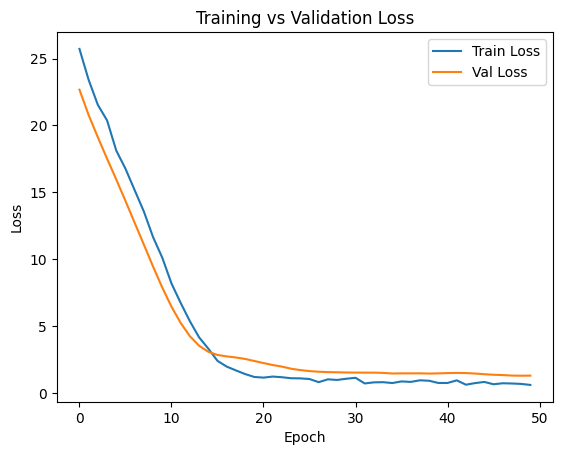

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
MSE : 1.2927545441059807
MAE : 0.8505652867423162
MAPE: 18.38478531538332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Prediksi  : [ 4.81134    5.8178544 10.73172    4.37569    3.952771   3.90168
  3.7633922  6.427404   5.785127   5.2168612]
Asli      : [4.61666667 4.88888889 7.15555556 3.92777778 4.23333333 4.12222222
 5.47777778 7.01666667 6.30555556 4.37777778]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)   # regresi → 1 output
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Flatten y_pred to a 1D array before calculating MAPE
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100

print("MSE :", mse)
print("MAE :", mae)
print("MAPE:", mape)
sample = X_test[:10]
preds = model.predict(sample)

print("Prediksi  :", preds.flatten())
print("Asli      :", y_test[:10].values)

**EVALUASI MODEL & PERBAIKAN**